# Generate publication figures

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns 
import os 
import matplotlib.gridspec as gridspec
import numpy as np
import joblib
from matplotlib.offsetbox import OffsetImage
from matplotlib.offsetbox import AnnotationBbox
from matplotlib.lines import Line2D
from matplotlib.patches import Circle
from matplotlib.patches import FancyArrowPatch
import matplotlib.patches as mpatches 
from matplotlib.collections import PatchCollection
from scipy import stats
from sklearn.neighbors import KernelDensity

In [2]:
from dotenv import load_dotenv
load_dotenv("../.env")

FIGURES = "../figures"
INPUT_FIGURES = "../data/input_figures"
TABLE = os.getenv("TABLE")
PDB_BIOCHEM = os.getenv("PDB_BIOCHEM")
POS_SET_SEQ_ID = os.getenv("POS_SET_SEQ_ID")
LOGISTIC_REGRESSION = os.getenv("LOGISTIC_REGRESSION")
CLF = joblib.load(LOGISTIC_REGRESSION)

/nfs/research/agb/research/francesco/anaconda3/envs/isopeptide/lib/python3.12/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.4.1.post1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [3]:
df = pd.read_csv(TABLE)
df["Deposition date"] = pd.to_datetime(df["Deposition date"])
df["id"] = df.apply(lambda x: f"{x['PDB code']}_"+
                    x["Chain"]+"_"+"_".join( 
                        [str(i) for i in sorted(
                            [
                            x["Position 1\r\n(Bond 1)"],
                            x["Position 2\r\n(catalytic)"],
                            x["Position 3\r\n(Bond 2)"]
                            ]
                            )]
                            ), axis=1)

identity_df = pd.read_csv(POS_SET_SEQ_ID)
identity_df["Target"] = identity_df["Target"].str.lower()
identity_df["Query"] = identity_df["Query"].str.lower()

df_bc = pd.read_csv(PDB_BIOCHEM)

In [4]:
# size of letters that specify images
ANNOT_FONT_SIZE = 20

## Figure 1

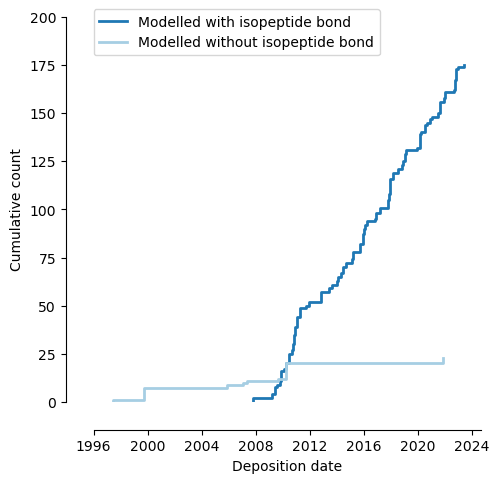

In [6]:
fig, ax = plt.subplots(figsize=[5, 5])

# 1

plot_df = df[df["Is bonded"] == True].copy()
plot_df["correct_geo_or_asgn"] = True
plot_df.loc[(plot_df["Fixed"]==True)|(plot_df["Bad rotamer"]==True), "correct_geo_or_asgn"] = False
g=sns.ecdfplot(data=plot_df, palette="Paired", 
      x="Deposition date", stat="count", hue="correct_geo_or_asgn", ax=ax, lw=2)
ax.legend(labels=["Modelled with isopeptide bond", "Modelled without isopeptide bond"], frameon=True)
sns.move_legend(g, (0, .9))
labels = [t.get_text() for t in ax.get_xticklabels()]
positions = [t.get_position()[0] for t in ax.get_xticklabels()]
ax.set_xticks(positions, labels)
ax.set_ylim([0,200])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Deposition date")
ax.set_ylabel("Cumulative count")
sns.despine(ax=ax, offset=20)

"""
# 2 

# im 1
ax = fig.add_axes(ax.get_position(), frameon=False)  # Overlay axes with the same position
ax.set_xlim(ax.get_xlim())
ax.set_ylim(ax.get_ylim())
ax.axis("off")  # Turn off ticks and labels

arr_img = plt.imread(os.path.join(INPUT_FIGURES, "7k1u_307_399_449_cut.png"))

im = OffsetImage(arr_img, zoom=0.08)
ab = AnnotationBbox(im, xy=(.55, .65) , box_alignment=(0.5, 0.5), bboxprops=dict(edgecolor="none"))
ax.add_artist(ab)

# Line
start = (.99, .51)
end = (0.6, 0.62)
ax.plot([start[0], end[0]], [start[1], end[1]], '--', zorder=20, color="gray")
ax.plot(start[0], start[1], 'o', color="gray", alpha=1)

# Annots
ax.text(x=0.3,y=.75,s="B.", fontsize=20)
ax.text(x=0.4, y=.65,s="K307")
ax.text(x=0.55,y=.55,s="D449")
ax.text(x=0.55,y=.76,s="E399")

# Add circle
palette = sns.color_palette("Paired", 2)
c1 = mpl.patches.Circle((.547,.65), .175, color=palette[1], fill=False, zorder=20, lw=2)
ax.add_patch(c1)

# im 2
arr_img = plt.imread(os.path.join(INPUT_FIGURES, "2x9y_349_405_428_cut.png"))
im = OffsetImage(arr_img, zoom=.08)
ab = AnnotationBbox(im, xy=(1.2, .3) , box_alignment=(0.5, 0.5), bboxprops=dict(color="white"))
ax.add_artist(ab)

# Line
start = (0.53, 0.1)
end = (1.03, 0.25)
ax.plot([start[0], end[0]], [start[1], end[1]], '--', zorder=100, color="gray")
ax.plot(start[0], start[1], 'o', color="gray", alpha=1)

ax.text(x=0.96,y=.4,s="C.", fontsize=20)
ax.text(x=1.05,y=.3,s="K349")
ax.text(x=1.2,y=.32,s="E405")
ax.text(x=1.15,y=.2,s="N428")

# Add circles
palette = sns.color_palette("Paired", 2)
c1 = mpl.patches.Circle((1.2,.297), .175, color=palette[0], fill=False, zorder=1000, lw=2, clip_on=False)
ax.add_patch(c1)

# im 3 
arr_img = plt.imread(os.path.join(INPUT_FIGURES, "1amx_A_176_209_293_cut.png"))
im = OffsetImage(arr_img, zoom=.08)
ab = AnnotationBbox(im, xy=(.05, .35), box_alignment=(0.5, 0.5), bboxprops=dict(color="white"))
ax.add_artist(ab)

# Line
start = (-.35, .01)
end = (-.09, .22)
ax.plot([start[0], end[0]], [start[1], end[1]], '--', zorder=100, color="gray")
ax.plot(start[0], start[1], 'o', color="gray", alpha=1)

# Annots
ax.text(x=-.2,y=.45,s="A.", fontsize=20)
ax.text(x=-.13,y=.35,s="K176", zorder=100)
ax.text(x=.05,y=.36,s="D209", zorder=1000)
ax.text(x=.05,y=.23,s="N293", zorder=1000)

# Add circle
palette = sns.color_palette("Paired", 2)
c1 = mpl.patches.Circle((.047,.351), .175, color=palette[0], fill=False, zorder=1000, lw=2, clip_on=False)
ax.add_patch(c1)

ax.set_aspect('equal', adjustable='datalim')
"""
plt.savefig(os.path.join(FIGURES, "f1.png"), dpi=350, bbox_inches="tight", pad_inches=0, transparent=False)

## Figure S1

In [7]:
# Load tables

res_df = pd.read_csv(
    "/nfs/research/agb/research/francesco/projects/20241213_IsopeptorDevelopment_v2/analysis/20241203_model_v3/output/jess_scan.csv"
)

cond1 = (res_df["bad_rotamer_low_res"]==0)
cond2 = (~res_df["mean_rASA"].isna())
cond3 = (identity_df["identity"]>0.3)
train_df = pd.merge(res_df[cond1 & cond2], 
                identity_df[cond3].rename(columns={"Query":"target_id", "Target":"template_id"})\
           .assign(allowed=0), on=["target_id", "template_id"], how="left").fillna(1)\
           .query('allowed==1').query('target_id!=template_id')\
           .sort_values("rmsd").drop_duplicates(["target", "target_residues"], keep="first")

res_df = pd.read_csv(
    "/nfs/research/agb/research/francesco/projects/20241213_IsopeptorDevelopment_v2/analysis/20241203_model_v3/output/jess_scan_test.csv"
)

cond1 = (res_df["true_positive_training_or_low_res"]==0)
cond2 = (~res_df["mean_rASA"].isna())
cond3 = (identity_df["identity"]>0.3)
test_df = pd.merge(res_df[cond1 & cond2], 
                identity_df[cond3].rename(columns={"Query":"target_id", "Target":"template_id"})\
           .assign(allowed=0), on=["target_id", "template_id"], how="left").fillna(1)\
           .query('allowed==1').query('target_id!=template_id')\
           .sort_values("rmsd").drop_duplicates(["target", "target_residues"], keep="first")

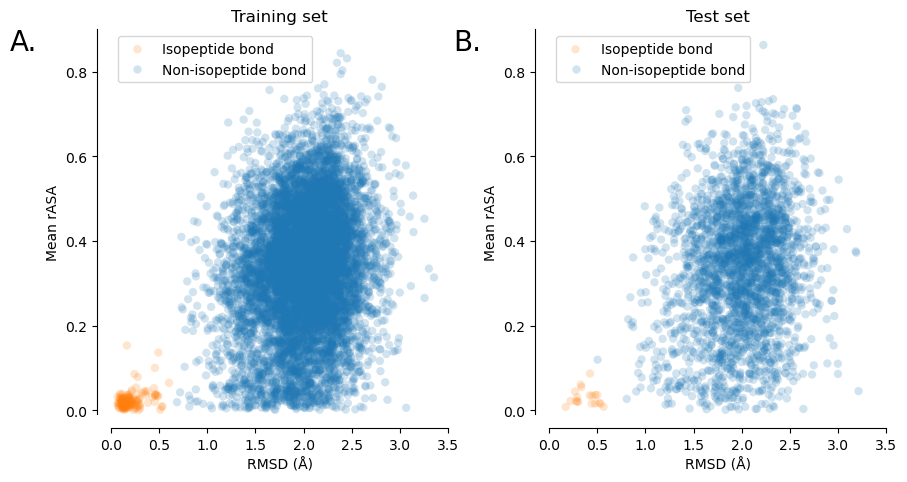

In [29]:
fig, axs = plt.subplots(ncols=2, figsize=[10, 5])
plt.subplots_adjust(wspace=.3)

#1
ax=axs[0]
g=sns.scatterplot(train_df, x="rmsd", y="mean_rASA", hue="true_positive", lw=0, alpha=.2, ax=ax)
ax.legend(title="", labels=["Isopeptide bond", "Non-isopeptide bond"])
ax.set_xlabel("RMSD (Å)")
ax.set_ylabel("Mean rASA")
ax.set_title("Training set")
ax.set_xlim([0, 3.5])
ax.set_ylim([-.01, .9])
sns.despine(ax=ax, offset=10)

#2
ax=axs[1]
g=sns.scatterplot(test_df, x="rmsd", y="mean_rASA", hue="true_positive", lw=0, alpha=.2, ax=ax)
ax.legend(title="", labels=["Isopeptide bond", "Non-isopeptide bond"])
ax.set_xlabel("RMSD (Å)")
ax.set_ylabel("Mean rASA")
ax.set_title("Test set")
ax.set_xlim([0, 3.5])
ax.set_ylim([-.01, .9])
sns.despine(ax=ax, offset=10)

plt.text(-5.6,.85, "A.", fontsize=ANNOT_FONT_SIZE)
plt.text(-1,.85, "B.", fontsize=ANNOT_FONT_SIZE)

plt.savefig(os.path.join(FIGURES, "fs1.png"), dpi=350, bbox_inches="tight", pad_inches=0, transparent=False)

## Figure S2

In [5]:
def draw_self_loop(center, radius, facecolor="Black", edgecolor='Black', theta1=-60, theta2=180, rotation=90):
    """ Adapted from https://naysan.ca/2020/07/04/how-to-draw-an-arrow-that-loops-with-matplotlib/"""
    
    # Add the ring (arc)
    rwidth = 0.005
    ring = mpatches.Wedge(center, radius, theta1, theta2, width=rwidth)
    
    # Calculate arrow cap position based on theta2
    theta2_rad = np.radians(theta2)  # Convert theta2 to radians
    x_end = center[0] + radius * np.cos(theta2_rad)
    y_end = center[1] + radius * np.sin(theta2_rad)
    
    # Convert rotation parameter to radians and add it to theta2 for the arrow orientation
    rotation_rad = np.radians(rotation)
    arrow_angle = theta2_rad + rotation_rad
    
    # Define the triangle cap at the end of the arc, with additional rotation
    offset = 0.02  # Width of the arrow cap
    left = [x_end - offset * np.cos(arrow_angle + np.pi/2), y_end - offset * np.sin(arrow_angle + np.pi/2)]
    right = [x_end + offset * np.cos(arrow_angle + np.pi/2), y_end + offset * np.sin(arrow_angle + np.pi/2)]
    bottom = [x_end + 0.05 * np.cos(arrow_angle), y_end + 0.05 * np.sin(arrow_angle)]
    arrow = plt.Polygon([left, right, bottom, left])
    
    # Add both the arc and arrow cap to a PatchCollection
    p = PatchCollection(
        [ring, arrow], 
        edgecolor=edgecolor, 
        facecolor=facecolor,
        zorder=100,
        clip_on=False
    )
    ax.add_collection(p)

In [6]:
res_df = pd.read_csv(
    "/nfs/research/agb/research/francesco/projects/20241213_IsopeptorDevelopment_v2/analysis/20241203_model_v3/output/jess_scan.csv"
)

cond1 = (res_df["bad_rotamer_low_res"]==0)
cond2 = (~res_df["mean_rASA"].isna())
cond3 = (identity_df["identity"]>0.3)
train_df = pd.merge(res_df[cond1 & cond2], 
                identity_df[cond3].rename(columns={"Query":"target_id", "Target":"template_id"})\
           .assign(allowed=0), on=["target_id", "template_id"], how="left").fillna(1)\
           .query('allowed==1').query('target_id!=template_id')\
           .sort_values("rmsd").drop_duplicates(["target", "target_residues"], keep="first")

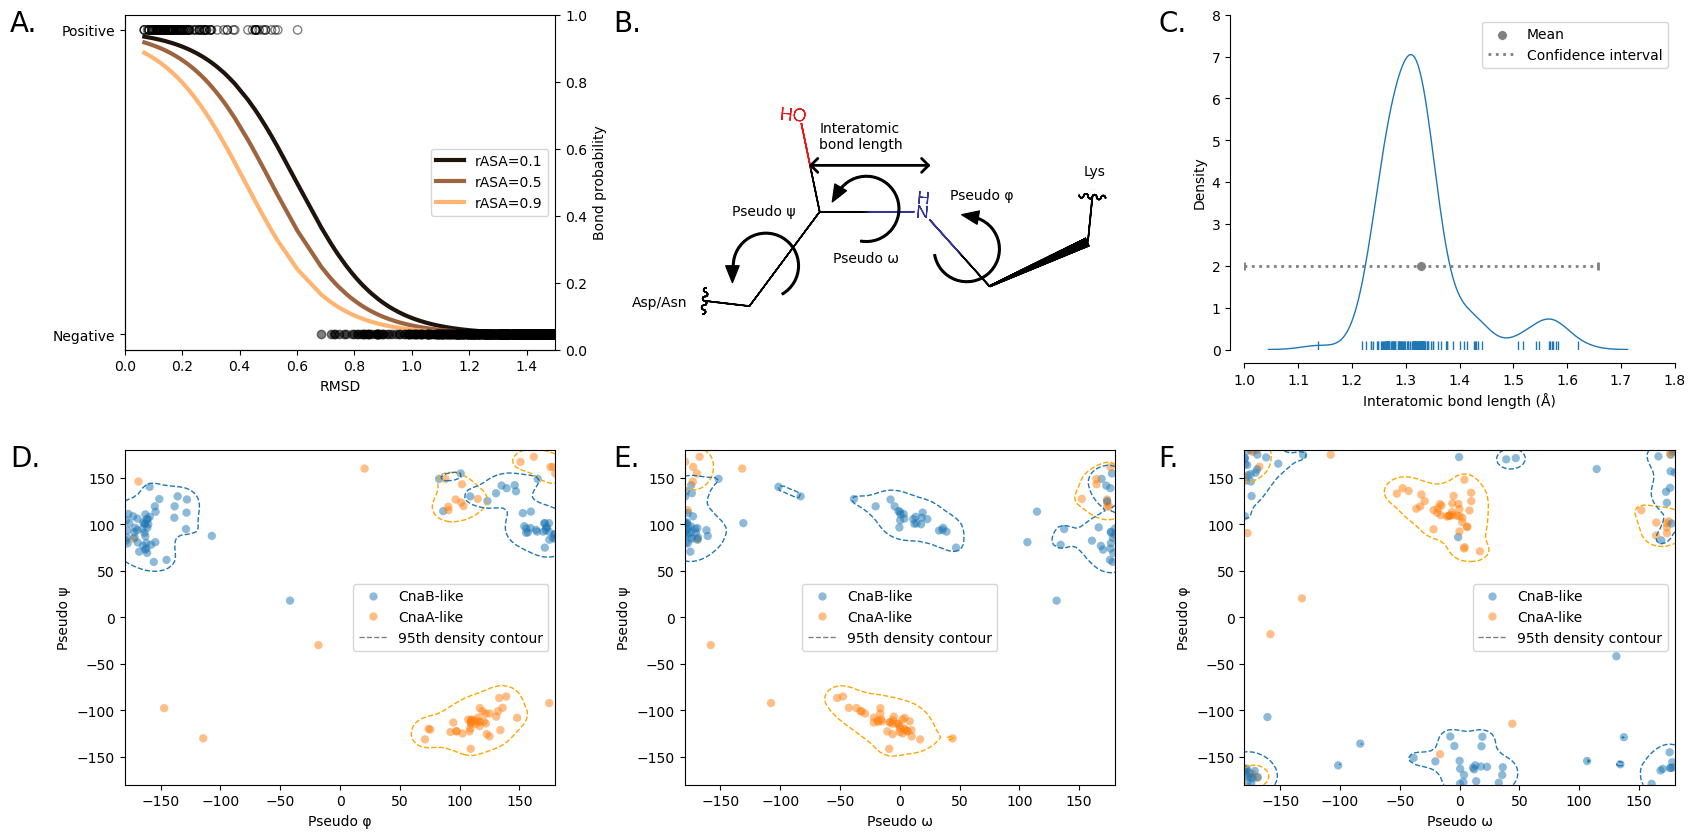

In [11]:
fig = plt.figure(figsize=[20, 10])
gs = gridspec.GridSpec(nrows=2, ncols=3, figure=fig, width_ratios=[1, 1, 1])

# Make plots spanning multiple axes
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 0])
ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[1, 2])

# 1
ax = ax1
plot_df = train_df[~train_df["mean_rASA"].isna()].sort_values("rmsd").drop_duplicates(["target_id"], keep="first")

sns.scatterplot(plot_df[plot_df["true_positive"]==1], x="rmsd", y="true_positive", alpha=.5, lw=1, ax=ax, edgecolors="black", 
               facecolors='none')
sns.scatterplot(plot_df[plot_df["true_positive"]==0], x="rmsd", y="true_positive", alpha=.5, lw=1, ax=ax, edgecolors="black", 
               facecolors='black')

copper = plt.get_cmap('copper')
for mean_asa in [0.1, 0.5, 0.9]:
    X =  plot_df.sort_values(["rmsd", "mean_rASA"])[["rmsd", "mean_rASA"]].assign(mean_rASA=mean_asa).to_numpy()
    ax.plot(X[:,0], CLF.predict_proba(X)[:,1], alpha=1, lw=3, ls="-", color=copper(mean_asa), zorder=0,
            label = f"rASA={mean_asa}")
ax.legend(loc="center right")
ax.set_yticks([0, 1])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.legend(title='Class', labels=['Positive', 'Negative'])
ax.set_ylabel("")
ax.set_xlabel("RMSD")
ax.set_yticks([0,1], ["Negative", "Positive"])
ax.set_xlim([0,1.5])

ax_r = ax.twinx()
ax_r.set_ylabel('Bond probability', color="black")
ax_r.tick_params(axis='y', labelcolor="black")

# 2
ax = ax2
ax.axis("off")
# Image of isopep bond
arr_img = plt.imread(os.path.join(INPUT_FIGURES, "isopepbond_cleaned.png"))
# Rotate
#arr_img = ndimage.rotate(arr_img, -3.8)
im = OffsetImage(arr_img, zoom=.15)
ab = AnnotationBbox(im, xy=(0.5, 0.25), box_alignment=(0.5, 0.5), bboxprops=dict(color="white"))
ax.add_artist(ab)

# Curved arrows and annot
ax.set_aspect('equal')
draw_self_loop(center=(.1, .25), radius=.1, theta1=-60, theta2=180)
draw_self_loop(center=(.4, .42), radius=.1, theta1=-100, theta2=140, rotation=100)
draw_self_loop(center=(.7, .3), radius=.1, theta1=-170, theta2=70, rotation=100)
ax.text(x=0, y=.4, s="Pseudo ψ")
ax.text(x=.3, y=.26, s="Pseudo ω")
ax.text(x=.65, y=.45, s="Pseudo φ")

# Bond len arrow
start_point = (0.22, 0.55)
end_point = (0.6, 0.55)
arrow = FancyArrowPatch(start_point, end_point, color="black", linewidth=2, arrowstyle="<->,head_width=5,head_length=5", 
                        zorder=10, ls="-")
ax.add_patch(arrow)
ax.text(x=.26, y=.6, s="Interatomic\nbond length", rotation=0)

# Other text
ax.text(x=-.3, y=.13, s="Asp/Asn")
ax.text(x=1.05, y=.52, s="Lys")

# 3
ax = ax3
cond1 = (df_bc["Is bonded"])
cond2 = (df_bc["Resolution"]<=2.5)
cond3 = (~df_bc["Bad rotamer"])
plot_df = df_bc[cond1 & cond2 & cond3]
cond4 = (stats.zscore(plot_df["bond_length"])<4)
plot_df = plot_df[cond4]
sns.kdeplot(plot_df, x="bond_length", ax=ax, 
     lw=1, fill=False)

mean = plot_df["bond_length"].mean()
stdev = plot_df["bond_length"].std()
sns.scatterplot(y=[2], x=[mean], ax=ax, color="gray", s=50, label="Mean")

cap_length = 0.1
ax.hlines(2, mean - (stdev)*4, mean + (stdev)*4, colors='gray', linestyles='dotted', linewidth=2, zorder=10, label="Confidence interval")
ax.vlines([mean - (stdev)*4, mean + (stdev)*4], 2 - cap_length, 2 + cap_length, colors='gray', linewidth=2, zorder=10)
ax.legend()
sns.rugplot(plot_df, x="bond_length", ax=ax, color="C0")
ax.set_xlabel("Interatomic bond length (Å)")
ax.set_xlim([1, 1.8])
ax.set_ylim([0, 8])
sns.despine(offset=10, ax=ax)

# 4, 5, 6
# Create grid points
x = np.linspace(-180, 180, 100)
y = np.linspace(-180, 180, 100)
X, Y = np.meshgrid(x, y)
grid_points = np.vstack([X.ravel(), Y.ravel()]).T

# Create a unique KDE model using all angles for the CnaA/B like bonds
cond1 = (df_bc["Is bonded"])
cond2 = (df_bc["Resolution"]<=2.5)
cond3 = (~df_bc["Bad rotamer"])
cond4 = (df_bc["Isopeptide type"] != "Mutant")

angle_pairs = [["phi", "psi"], ["omega", "psi"], ["omega", "phi"]]
bond_types = ["CnaA-like", "CnaB-like"]
angle_dic = {
    "phi": "φ",
    "psi": "ψ",
    "omega": "ω"
}
for angle_pair, ax in zip(angle_pairs, (ax4, ax5, ax6)):
    # Overlay scatter plot
    sns.scatterplot(
        data=df_bc[cond1 & cond2 & cond3 & cond4],
        x=f"pseudo_{angle_pair[0]}",
        y=f"pseudo_{angle_pair[1]}",
    ax=ax, lw=0, alpha=.5, hue="Isopeptide type")
    ax.set_xlabel(f"Pseudo {angle_dic[angle_pair[0]]}")
    ax.set_ylabel(f"Pseudo {angle_dic[angle_pair[1]]}")

    for bond_type in bond_types:
        
        angles = df_bc[cond1 & cond2 & cond3 & (df_bc["Isopeptide type"]==bond_type)][[f"pseudo_{angle_pair[0]}", f"pseudo_{angle_pair[1]}"]].to_numpy()
        kde = KernelDensity(bandwidth=10).fit(angles)
        log_densities_high_quality = kde.score_samples(angles)
        threshold = round(np.percentile(log_densities_high_quality, 5), 3)

        # Evaluate KDE on the grid
        density = np.exp(kde.score_samples(grid_points)).reshape(X.shape)

        # Plot the KDE contours
        #ax.contour(X, Y, density, levels=3, cmap="Grays")

        # Plot border 
        if bond_type == "CnaA-like":
            ax.contour(x, y, density, levels=[np.exp(threshold)], colors="orange", linewidths=1, linestyles="--")
        if bond_type == "CnaB-like":
            ax.contour(x, y, density, levels=[np.exp(threshold)], colors="C0", linewidths=1, linestyles="--")

    # Add the proxy artist to the legend
    contour_proxy = plt.Line2D([0], [0], color="gray", linestyle="--", linewidth=1, label="95th density contour")
    ax.legend(handles=ax.get_legend_handles_labels()[0] + [contour_proxy])
    plt.subplots_adjust(hspace=.3, wspace=.3)

plt.text(-.4, .95, "A.", fontsize=ANNOT_FONT_SIZE)
plt.text(1.7, .95, "B.", fontsize=ANNOT_FONT_SIZE)
plt.text(3.6, .95, "C.", fontsize=ANNOT_FONT_SIZE)
plt.text(-.4, -.35, "D.", fontsize=ANNOT_FONT_SIZE)
plt.text(1.7, -.35, "E.", fontsize=ANNOT_FONT_SIZE)
plt.text(3.6, -.35, "F.", fontsize=ANNOT_FONT_SIZE)

plt.savefig(os.path.join(FIGURES, "fs2.png"), dpi=350, bbox_inches="tight", pad_inches=0)